<a href="https://colab.research.google.com/github/monifonse/Deber/blob/main/MONIDEBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import pandas as PD
import sqlalchemy
import urllib

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
from pandas.io.parsers.readers import read_csv
datos = read_csv("/content/big_bang_theory_dataset.csv")
datos.head()


,Unnamed: 0,Location,Scene,Text,Speaker,Season
0,0,The apartment,NaN,Again I’m right here.,Leonard,3
1,1,The apartment,NaN,Fine. The record shall so reflect. Now getting...,Sheldon,5
2,2,The room in the basement,"Sheldon enters, takes out a box, takes a bean...",One two three four five six seven eight… Drat....,Sheldon,6
3,3,Sheldon and Amy’s bedroom,NaN,I’m not sure. Earlier tonight things began org...,Sheldon,10
4,4,A cinema,NaN,He’s finding the acoustic sweet spot.,Leonard,2


In [7]:
datos1=datos[datos['Speaker'].eq('Sheldon')]

In [9]:
datos2=datos1[datos1['Text'].eq('Penny.')]

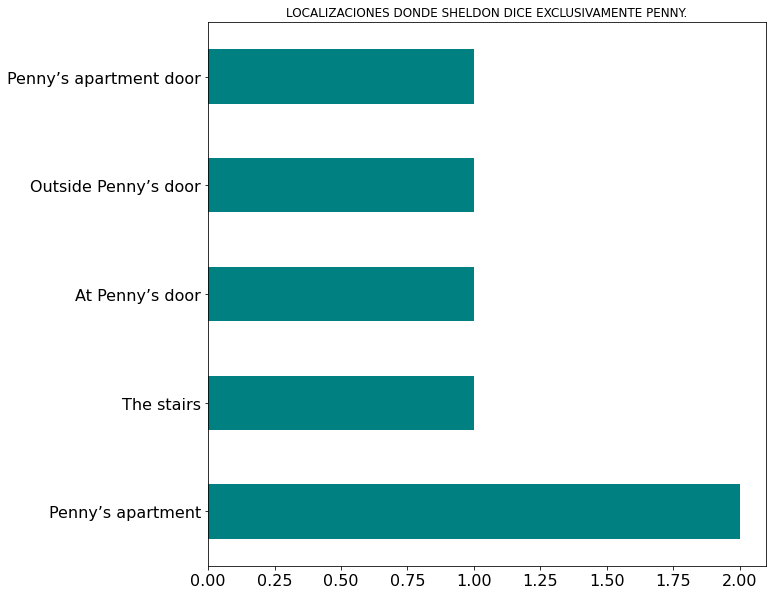

In [11]:
fig1=datos2['Location'].value_counts().plot(kind='barh', color='teal', title='LOCALIZACIONES DONDE SHELDON DICE EXCLUSIVAMENTE PENNY.', rot=0, figsize=(10, 10), fontsize=16)

In [12]:
fig1.title.set_size(26)

In [13]:
fig1

In [14]:
datos3=datos1[datos1['Text'].str.contains('Penny', case=True, na=False)]

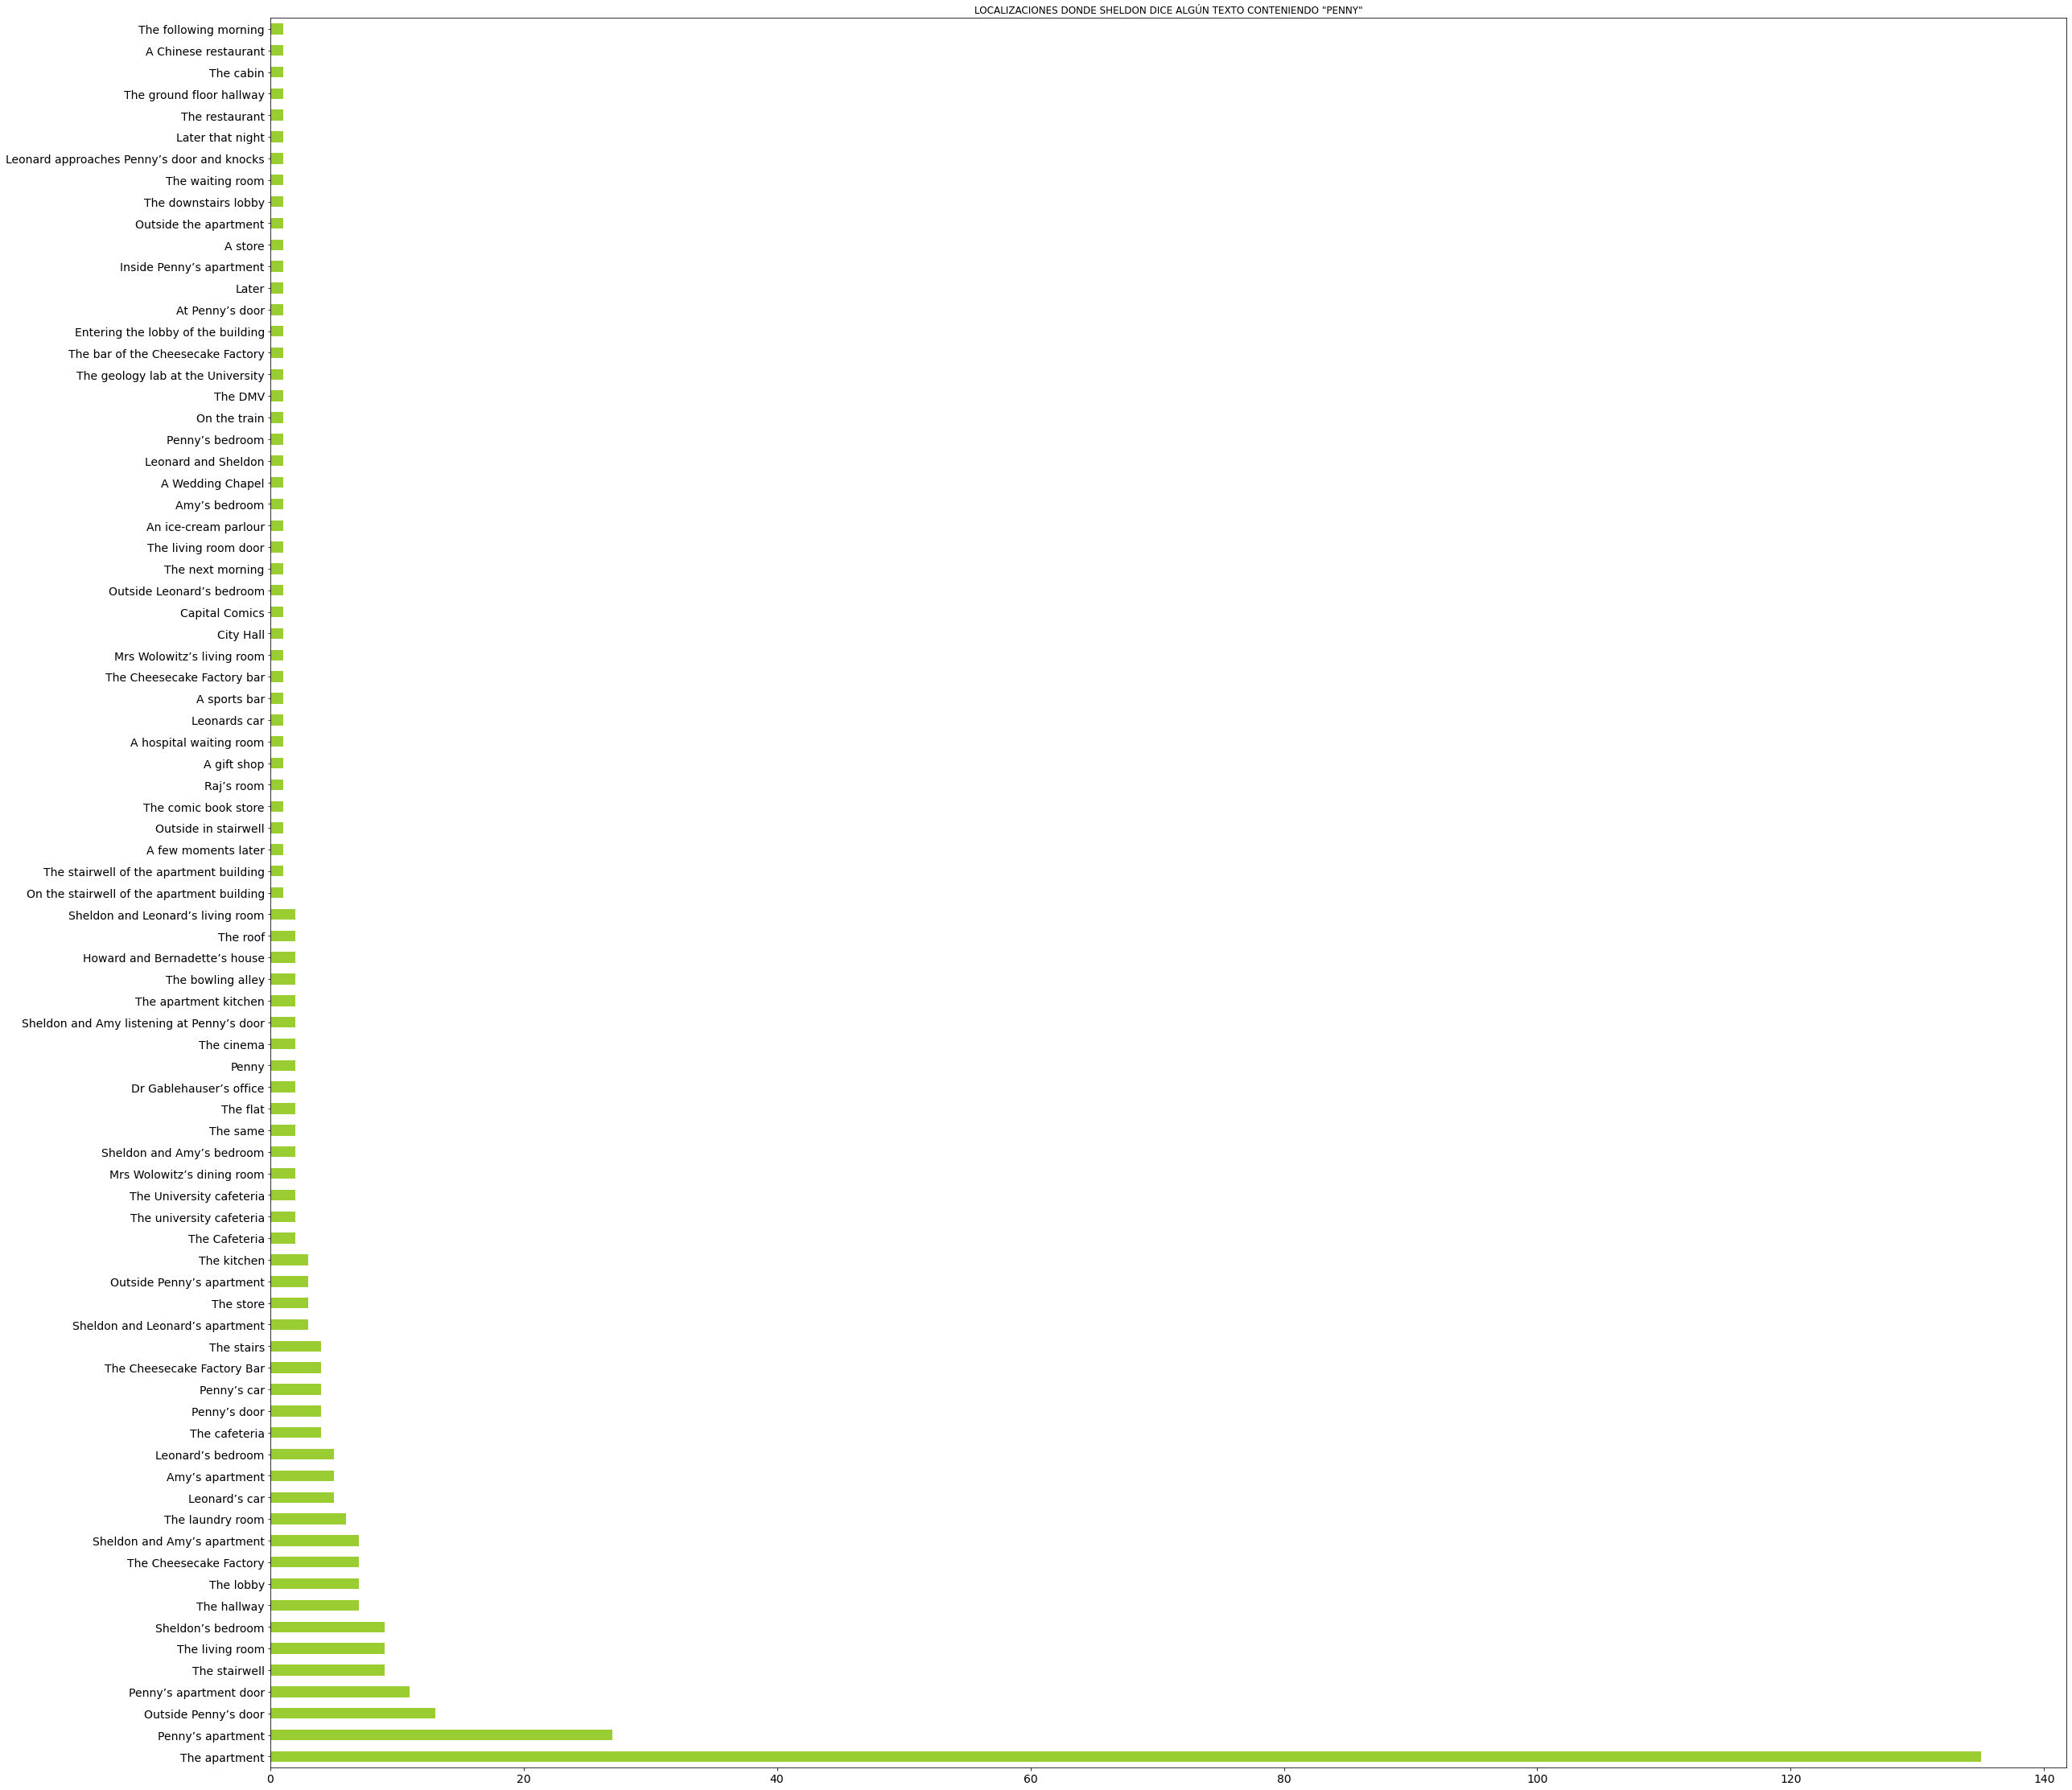

In [15]:
fig2=datos3['Location'].value_counts().plot(kind='barh', color='yellowgreen', title='LOCALIZACIONES DONDE SHELDON DICE ALGÚN TEXTO CONTENIENDO "PENNY"', rot=0, figsize=(40, 40), fontsize=14)


In [16]:
fig1.title.set_size(26)

In [17]:
Speakerstr=datos['Speaker'].astype(str)

In [19]:
Locationstr=datos['Location'].astype(str)

Text(0.5, 1.0, 'LOCALIZACIÓN vs SPEAKER Big Bang Theory')

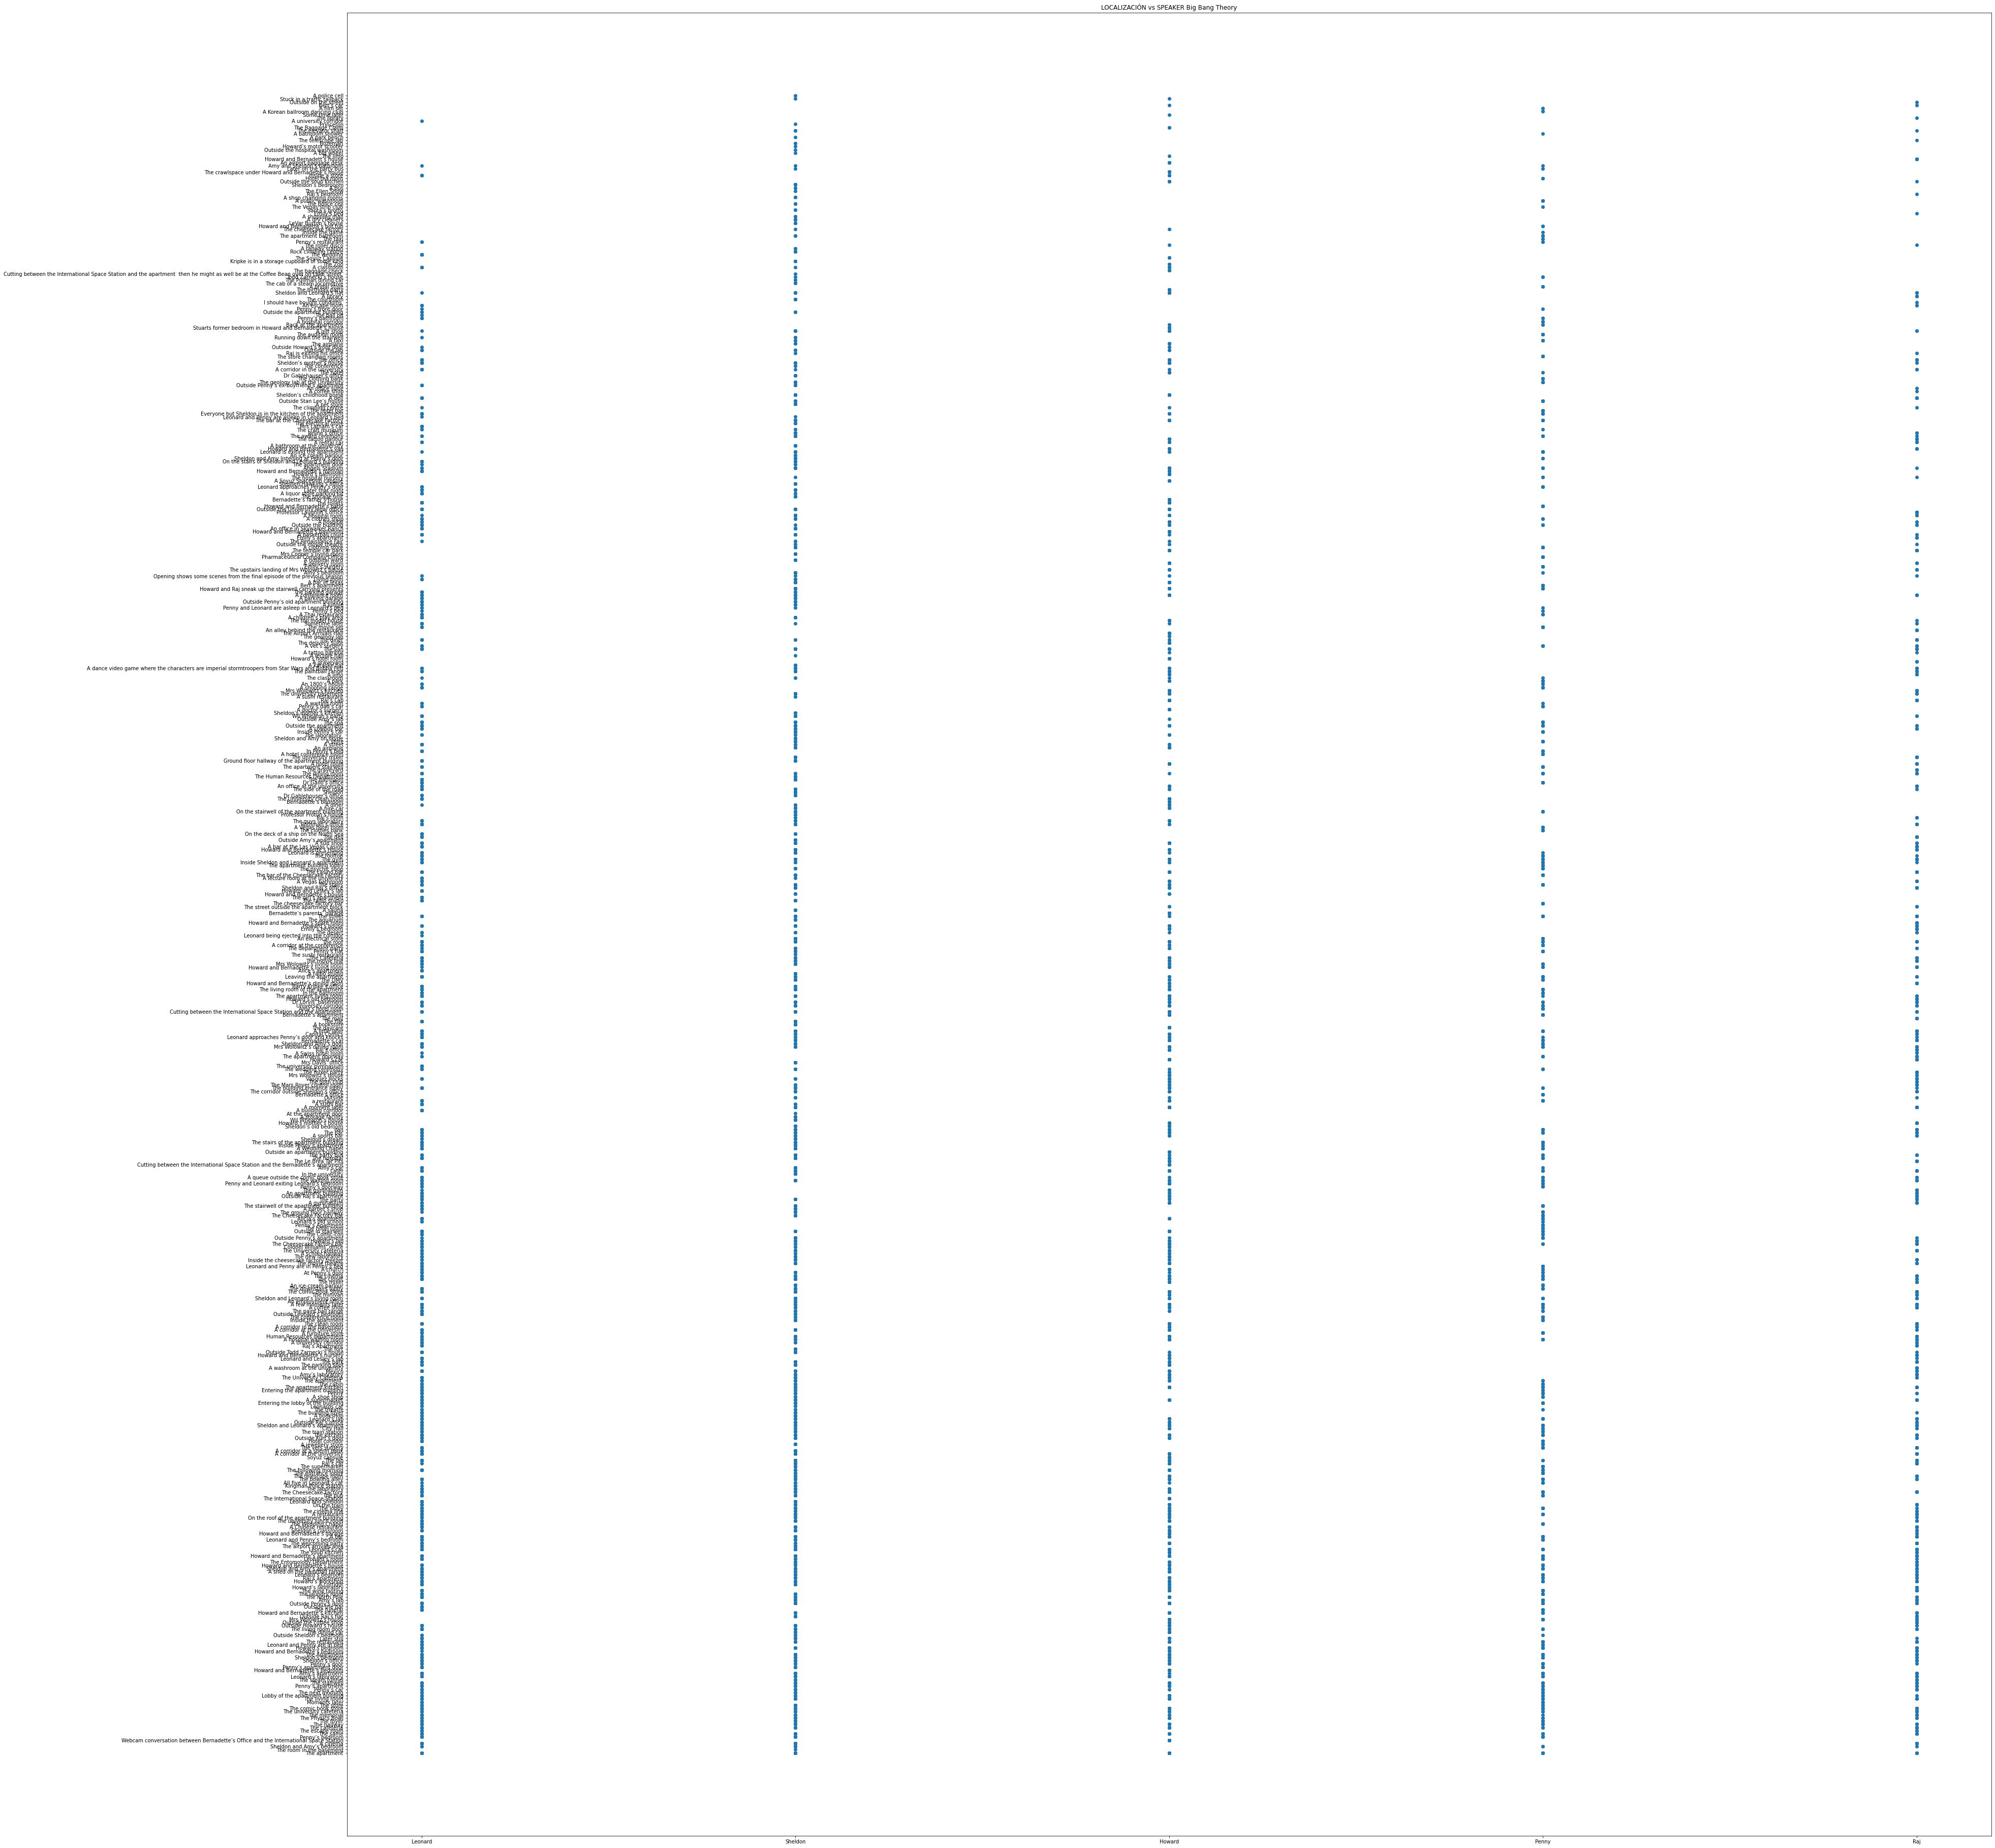

In [21]:
plt.scatter(Speakerstr, Locationstr)
plt.gcf().set_size_inches(58, 66)
plt.title("LOCALIZACIÓN vs SPEAKER Big Bang Theory")

In [22]:
datos.groupby(['Season','Speaker']).count()

Unnamed: 0  Location  Scene  Text
Season Speaker                                   
1      Howard          397       396    204   237
       Leonard        1172      1171    595  1171
       Penny           664       663    372   663
       Raj             238       237    104   237
       Sheldon        1096      1095    587  1094
2      Howard          591       590    171   338
       Leonard        1268      1267    425  1267
       Penny           940       939    415   939
       Raj             339       338     77   338
       Sheldon        1341      1340    581  1340
3      Howard          606       605    110   526
       Leonard        1055      1054    185  1054
       Penny           823       822    104   822
       Raj             527       526    115   526
       Sheldon        1216      1215    239  1215
4      Howard          607       606    106   486
       Leonard        1146      1145    261  1145
       Penny           723       722    109   722
       Raj             487       486     67   486
       Sheldon        1339      1338    324  1338
5      Howard          565       564     71   359
       Leonard         907       906    241   906
       Penny           672       671    158   671
       Raj             360       359     74   359
       Sheldon        1020      1019    251  1019
6      Howard          676       675     59   525
       Leonard         792       791    101   791
       Penny           667       666     94   666
       Raj             527       526     57   525
       Sheldon        1029      1028    140  1022
7      Howard          584       583     26   554
       Leonard         844       843     45   843
       Penny           797       796     42   796
       Raj             555       554     12   554
       Sheldon        1093      1092     89  1092
8      Howard          601       600     12   511
       Leonard         886       885     31   885
       Penny           770       769      4   769
       Raj             512       511     24   511
       Sheldon        1097      1096     34  1096
9      Howard          570       569     16   483
       Leonard         842       841     32   841
       Penny           715       714     17   714
       Raj             484       483      8   483
       Sheldon        1099      1098     35  1098
10     Howard          557       556     30   554
       Leonard         755       754     33   754
       Penny           695       694     23   694
       Raj             555       554     11   554
       Sheldon        1117      1116     34  1115

In [24]:
mencionPennyBool=(datos['Text'].str.contains('Penny', case=True, na=False))*1
datos.insert(6, "ColMenPenny", mencionPennyBool, True)

In [25]:
dfatpP=datos.groupby(['Season','Speaker'])['ColMenPenny'].sum()

In [27]:
print('')
print('Grupos por temporada-personaje y el correspondiente número de veces que se menciona Penny')
print(dfatpP)


Grupos por temporada-personaje y el correspondiente número de veces que se menciona Penny
Season  Speaker
1       Howard      6
        Leonard    62
        Penny       5
        Raj         6
        Sheldon    40
2       Howard      8
        Leonard    56
        Penny       9
        Raj         8
        Sheldon    73
3       Howard      7
        Leonard    52
        Penny       3
        Raj         7
        Sheldon    59
4       Howard      5
        Leonard    19
        Penny       1
        Raj         5
        Sheldon    37
5       Howard     12
        Leonard    15
        Penny       2
        Raj        12
        Sheldon    30
6       Howard      7
        Leonard    23
        Penny       3
        Raj         7
        Sheldon    32
7       Howard     10
        Leonard    31
        Penny       2
        Raj        10
        Sheldon    27
8       Howard      6
        Leonard    11
        Penny       0
        Raj         6
        Sheldon    24
9       Howar

In [40]:
dfig=(datos.groupby(['Season','Speaker'])['ColMenPenny'].sum()).reset_index()
dfig['Speaker']=dfig['Speaker'].astype('category')
dfig['Speaker']=dfig['Speaker'].cat.codes
X=dfig.drop(columns='ColMenPenny')
y=dfig['ColMenPenny']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)
log_reg.predict(X_train_scaled)
log_reg.score(X_train_scaled, y_train)
log_reg1 = LogisticRegression(random_state = 0, C= 1, fit_intercept = True).fit(X_train_scaled, y_train)
log_reg1




LogisticRegression(C=1, random_state=0)